In [1]:
import numpy as np
import h3
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.gridspec as gridspec

def pcolorhex(ax,hexagons,colors,draw_edges=True,fill_polygons=True,transform=ccrs.PlateCarree(),extent=None,dict_h3_location=None,**kwargs):
        
    for i1,hex_ in enumerate(hexagons):
        # x = np.array(h3.h3_to_geo_boundary(hex(hex_)))[:,1]
        # y = np.array(h3.h3_to_geo_boundary(hex(hex_)))[:,0]
        x = np.array(h3.h3_to_geo_boundary(hex_))[:,1]
        y = np.array(h3.h3_to_geo_boundary(hex_))[:,0]        
        x_hexagon = np.append(x,x[0]) 
        y_hexagon = np.append(y,y[0])
         
        if x_hexagon.max() - x_hexagon.min() > 25:
            x_hexagon[x_hexagon < 0] += 360
            
        if draw_edges:
            ax.plot(x_hexagon, y_hexagon, 'k-',transform=transform,linewidth=.2)
        
        if fill_polygons:
            ax.fill(x_hexagon,y_hexagon,color=colors[i1],transform=transform,**kwargs)    
            
def get_colors(inp, colormap, vmin=None, vmax=None):
    norm = plt.Normalize(vmin, vmax)
    return colormap(norm(inp))

In [2]:
'''
EXPLANATION
we're using the uber h3 hexagonal grid system here. The hexagons have unique hexadecimal indices (see column h3_hex_ID).
In our model we've converted these to integer indices, as shown in the first column on the dataset. The hexagon midpoints (lon/lat) are presented
in the 2nd/3rd columns.
In the 5th column (depth_ID), we show at which depth the quantity is given:
0 = 0-5 meters (ocean surface)
-1 = 5-50 meters
-2 = 50-500 meters
-3 = 500-inf meters
1 = coastlines (on land)

The remaining columns show the quantity of interest. This can be the mass, the number of particles (num) and the number of fishing related items (num_f)
separate datafiles are given for the total amount of plastics [grams], and  the plastic concentrations [grams/m3 in the ocean, grams/m on beaches]
The quantities of interest are given for different particle sizes, ranging from 0.1 mm to 1.6 meters.
The final column gives the quantity of interest for all particle sizes combined

packages that you need to install are pandas, matplotlib, cartopy, h3, and numpy (see imports)
'''

data = pd.read_csv('2015_mass_concentration.csv',index_col=0)
data

,lon,lat,h3_hex_ID,depth_ID,mass_concentration_l=1638.40[mm],mass_concentration_l=819.20[mm],mass_concentration_l=409.60[mm],mass_concentration_l=204.80[mm],mass_concentration_l=102.40[mm],mass_concentration_l=51.20[mm],mass_concentration_l=25.60[mm],mass_concentration_l=12.80[mm],mass_concentration_l=6.40[mm],mass_concentration_l=3.20[mm],mass_concentration_l=1.60[mm],mass_concentration_l=0.80[mm],mass_concentration_l=0.40[mm],mass_concentration_l=0.20[mm],mass_concentration_l=0.10[mm],mass_concentration_l=total
0,NaN,NaN,0x0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,0x1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,0x2,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
289972169660825599,31.757227,81.957490,0x830008fffffffff,-3,4.185520e-12,1.894709e-11,3.159731e-11,2.050210e-11,6.322770e-12,2.193516e-12,1.449720e-12,5.695329e-12,7.431102e-12,2.114614e-11,2.413836e-11,1.071885e-11,1.052265e-12,2.862304e-12,5.608837e-12,1.638512e-10
289972238380302335,25.863445,82.748110,0x830009fffffffff,-3,2.314650e-13,1.048551e-12,1.751499e-12,1.145055e-12,3.622968e-13,1.285971e-13,8.396003e-14,2.553624e-13,3.059611e-13,8.077323e-12,1.107482e-11,5.110944e-12,8.976389e-14,2.985644e-13,8.671208e-13,3.083128e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690792817652006911,145.711300,44.855713,0x832eaefffffffff,1,4.715902e-01,2.192619e+00,3.853078e+00,2.741769e+00,1.120259e+00,4.790983e-01,2.483659e-01,1.250447e-01,6.066954e-02,3.210876e-02,1.678328e-02,9.782932e-03,6.559207e-03,3.950160e-03,2.303873e-03,1.136398e+01
690381737742172159,166.698850,59.892060,0x831750fffffffff,1,2.296355e-01,1.065293e+00,1.866711e+00,1.309825e+00,5.115053e-01,2.100074e-01,1.058637e-01,5.259478e-02,2.461603e-02,1.093033e-02,5.560066e-03,3.041810e-03,1.592297e-03,9.553049e-04,5.718133e-04,5.398702e+00
690505432800296959,30.387722,45.588078,0x831e58fffffffff,1,3.958688e-01,1.837338e+00,3.227016e+00,2.280894e+00,8.990546e-01,3.762289e-01,1.951646e-01,9.833116e-02,4.659297e-02,2.140352e-02,1.142953e-02,6.315194e-03,3.287062e-03,1.933444e-03,1.174641e-03,9.402032e+00
690062054736396287,91.265170,79.440660,0x830524fffffffff,1,1.280275e-01,5.975003e-01,1.058771e+00,7.784318e-01,3.418485e-01,1.657820e-01,9.544287e-02,5.360184e-02,2.914883e-02,1.581560e-02,8.810711e-03,5.372415e-03,2.902967e-03,1.924176e-03,1.299115e-03,3.284680e+00


In [3]:
# enter which column of the dataset you want to plot
qtt_interest = 'mass_concentration_l=total'

# here we create a mask of the depth we want to plot
mask = data['depth_ID'] == 0

# the first 3 values need to be masked out
mask[0:3] = False

# mask out zeros and possible negative values (were plotting on a log scale)
mask = mask & ~(data[qtt_interest] <= 0)

# you can easily add additional masking for e.g. certain lons/lats:
# mask = mask & ( (data['lon'] > 0) & (data['lon'] < 10))

        


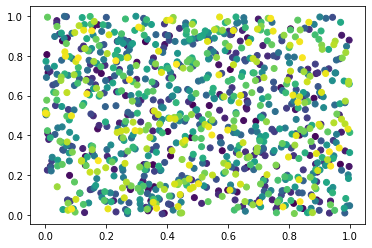

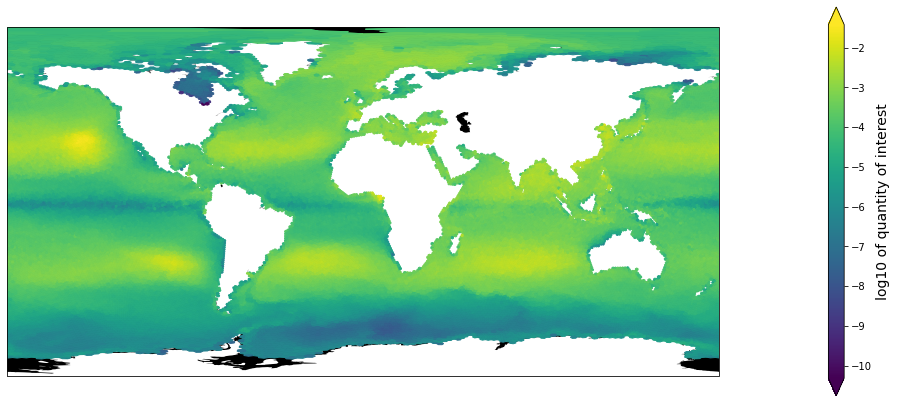

In [4]:
h3_plot = data['h3_hex_ID'][mask]

cmap = plt.cm.viridis

vec_select = data['mass_concentration_l=total'][mask]
vmin = vec_select.min()
vmax = vec_select.max()
colors = get_colors(np.log10(vec_select),cmap,
                    vmin=np.log10(vmin),vmax=np.log10(vmax))

# a bit annoying, but we need to make a fake colorbar here for the next real plot
fig,ax = plt.subplots(1)
cplt = ax.scatter(np.random.random(1000),np.random.random(1000),c=np.linspace(np.log10(vmin),np.log10(vmax),1000),cmap=cmap)

# the real plot
fig = plt.figure(figsize=(15, 6))
gs = gridspec.GridSpec(1, 2, width_ratios=[45,1],bottom=.05, top=.95, wspace=.3)
ax = plt.subplot(gs[0,0], projection=ccrs.PlateCarree())
ax.add_feature(cfeature.NaturalEarthFeature('physical','ocean','50m'),facecolor='k',zorder=-1)        
pcolorhex(ax,h3_plot,colors,draw_edges=False,alpha=1.)
cbar_ax = plt.subplot(gs[0,1])
cbar = plt.colorbar(cplt,cax=cbar_ax,extend='both')
cbar.set_label('log10 of quantity of interest',fontsize=14)

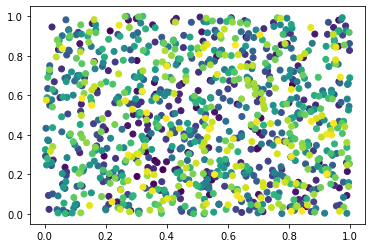

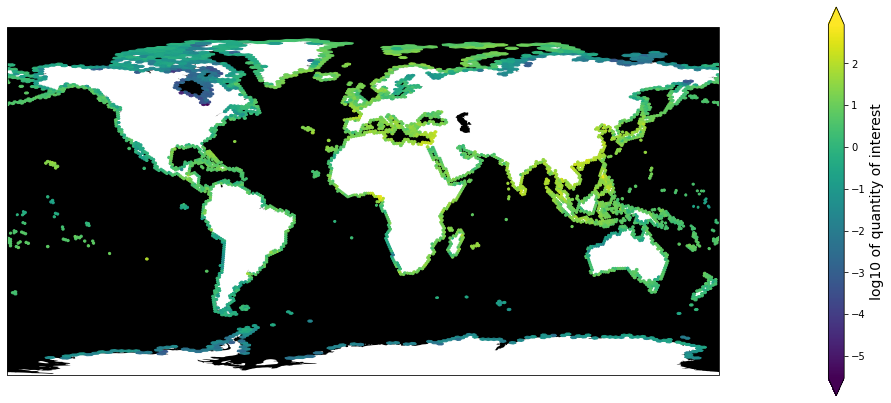

In [5]:
# EXAMPLE COASTLINE PLOT

# enter which column of the dataset you want to plot
qtt_interest = 'mass_concentration_l=total'

# here we create a mask of the depth we want to plot
mask = data['depth_ID'] == 1

# the first 3 values need to be masked out
mask[0:3] = False

# mask out zeros and possible negative values (were plotting on a log scale)
mask = mask & ~(data[qtt_interest] <= 0)



h3_plot = data['h3_hex_ID'][mask]

cmap = plt.cm.viridis

vec_select = data['mass_concentration_l=total'][mask]
vmin = vec_select.min()
vmax = vec_select.max()
colors = get_colors(np.log10(vec_select),cmap,
                    vmin=np.log10(vmin),vmax=np.log10(vmax))

# a bit annoying, but we need to make a fake colorbar here for the next real plot
fig,ax = plt.subplots(1)
cplt = ax.scatter(np.random.random(1000),np.random.random(1000),c=np.linspace(np.log10(vmin),np.log10(vmax),1000),cmap=cmap)

# the real plot
fig = plt.figure(figsize=(15, 6))
gs = gridspec.GridSpec(1, 2, width_ratios=[45,1],bottom=.05, top=.95, wspace=.3)
ax = plt.subplot(gs[0,0], projection=ccrs.PlateCarree())
ax.add_feature(cfeature.NaturalEarthFeature('physical','ocean','50m'),facecolor='k',zorder=-1)        
pcolorhex(ax,h3_plot,colors,draw_edges=False,alpha=1.)
cbar_ax = plt.subplot(gs[0,1])
cbar = plt.colorbar(cplt,cax=cbar_ax,extend='both')
cbar.set_label('log10 of quantity of interest',fontsize=14)